In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os
from PIL import Image
from os import listdir
# from ResidualAttentionNetwork import ResidualAttentionNetwork
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import Callback
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
!unzip /content/drive/MyDrive/GR5242/gr5242_project/train_data_generated_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data_generated_2/input/37.png  
  inflating: train_data_generated_2/input/370.png  
  inflating: train_data_generated_2/input/3700.png  
  inflating: train_data_generated_2/input/3701.png  
  inflating: train_data_generated_2/input/3702.png  
  inflating: train_data_generated_2/input/3703.png  
  inflating: train_data_generated_2/input/3704.png  
  inflating: train_data_generated_2/input/3705.png  
  inflating: train_data_generated_2/input/3706.png  
  inflating: train_data_generated_2/input/3707.png  
  inflating: train_data_generated_2/input/3708.png  
  inflating: train_data_generated_2/input/3709.png  
  inflating: train_data_generated_2/input/371.png  
  inflating: train_data_generated_2/input/3710.png  
  inflating: train_data_generated_2/input/3711.png  
  inflating: train_data_generated_2/input/3712.png  
  inflating: train_data_generated_2/input/3713.png  
  inflating: train_data_generated_2/input/3714.png  

In [ ]:
!unzip /content/drive/MyDrive/GR5242/gr5242_project/train_data_generated.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data_generated/label/5499.png  
  inflating: train_data_generated/label/55.png  
  inflating: train_data_generated/label/550.png  
  inflating: train_data_generated/label/5500.png  
  inflating: train_data_generated/label/5501.png  
  inflating: train_data_generated/label/5502.png  
  inflating: train_data_generated/label/5503.png  
  inflating: train_data_generated/label/5504.png  
  inflating: train_data_generated/label/5505.png  
  inflating: train_data_generated/label/5506.png  
  inflating: train_data_generated/label/5507.png  
  inflating: train_data_generated/label/5508.png  
  inflating: train_data_generated/label/5509.png  
  inflating: train_data_generated/label/551.png  
  inflating: train_data_generated/label/5510.png  
  inflating: train_data_generated/label/5511.png  
  inflating: train_data_generated/label/5512.png  
  inflating: train_data_generated/label/5513.png  
  inflating: train_data_generated/l

In [ ]:
os.getcwd()

'/content'

In [ ]:
input_dir = '/content/train_data_generated_2/input'
label_dir = '/content/train_data_generated_2/label'

In [ ]:
input_dir_2 = '/content/train_data_generated/input'
label_dir_2 = '/content/train_data_generated/label'

In [ ]:
image_list1 = []
for filename in os.listdir(input_dir)[:1500]:
    im=cv2.imread(input_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list1.append(im)

In [ ]:
len(image_list1)

1500

In [ ]:
image_list2 = []
for filename in os.listdir(label_dir)[:1500]:
    im=cv2.imread(label_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list2.append(im)

In [ ]:
len(image_list2)

1500

In [ ]:
image_list5 = []
for filename in os.listdir(input_dir)[2000:2200]:
    im=cv2.imread(input_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list5.append(im)

image_list6 = []
for filename in os.listdir(label_dir)[2000:2200]:
    im=cv2.imread(label_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list6.append(im)

In [ ]:
len(image_list5),len(image_list6)

(200, 200)

In [ ]:
X_train = np.asarray(image_list1,dtype=np.float32)
y_train = np.asarray(image_list2,dtype=np.float32)
x_test = np.asarray(image_list5,dtype=np.float32)
y_test = np.asarray(image_list6,dtype=np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,BatchNormalization,Dropout
import numpy as np
import tensorflow as tf

# Loss functtion
def ssim_loss(y_true, y_pred):
  return 255-tf.reduce_mean(tf.image.ssim(y_true, y_pred, 255.0))

# Model: Input Image size: 32X32X1 output Image size: 32X32X1 
# check model.summary
model = Sequential()
model.add(Conv2D(128, (1, 1),
                 activation='relu',
                 input_shape=(64,64,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(512,  (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(1024, (7, 7),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(512, (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256,  (3, 3),
                 activation='relu',padding='same'))
model.add(Conv2D(128,  (1, 1),
                 activation='relu',padding='same'))
model.add(Conv2D(64,  (1, 1),
                 activation='relu',padding='same'))
model.add(Conv2D(3,  (1, 1),
                 activation='relu',padding='same'))

model.compile(optimizer='adam', loss='MSE')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/GR5242/64x64 color output/')

In [ ]:
simple_img = np.expand_dims(cv2.imread(input_dir + '/' +'3762.png').astype('int32'), axis=0)
mid_img = np.expand_dims(cv2.imread(input_dir + '/' +'2870.png').astype('int32'), axis=0)
hard_img = np.expand_dims(cv2.imread(input_dir + '/' +'3950.png').astype('int32'), axis=0)

Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 256.1581
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 228.0911
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 208.6207
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 199.4210
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 230.2797


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 197.8898
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 177.7968
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 197.4700
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 185.1427
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 183.9652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 197.5615
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 178.0394
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 166.0096
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 172.5682
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 167.2003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 158.2460
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 164.6744
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 159.9495
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 172.8738
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 154.8929


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


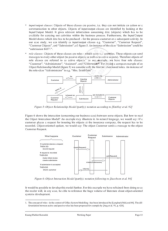

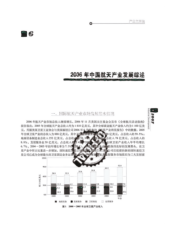

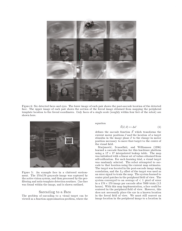

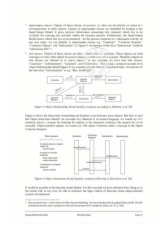

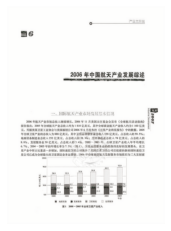

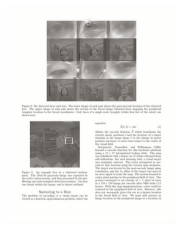

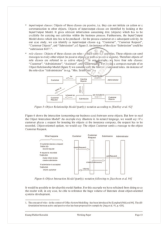

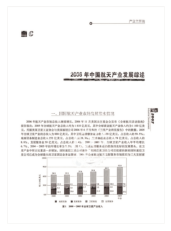

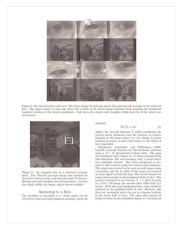

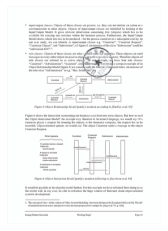

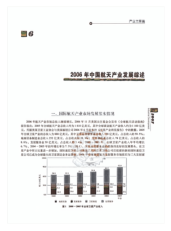

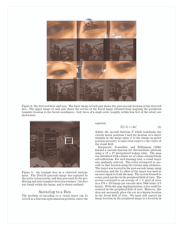

In [ ]:
history_list = []
for i in range(10,30,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_20th_3_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_20th_3_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32')) 
  

Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 151.9594
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 149.4949
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 158.3072
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 153.0915
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 147.3687


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 153.3552
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 145.9264
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 144.8258
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 144.1728
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 142.6782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


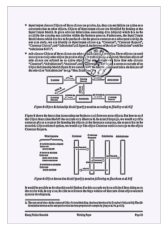

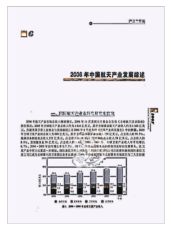

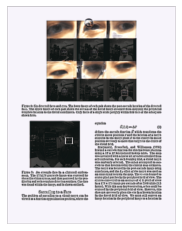

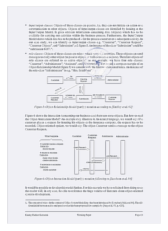

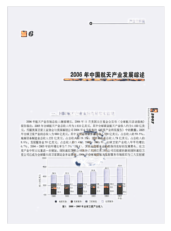

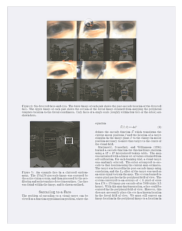

In [ ]:
for i in range(35,45,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_20th_3_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_20th_3_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32'))

Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 127.0900
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 132.4449
Epoch 3/5
188/188 [==============================] - 106s 564ms/step - loss: 119.6606
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 120.2480
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 107.2825


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 114.9401
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 105.9144
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 102.1301
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 96.5339
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 100.9731


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 103.4901
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 89.8827
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 89.4689
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 89.9386
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 92.5257


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


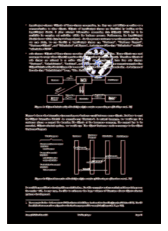

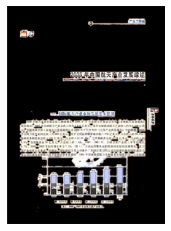

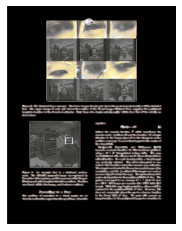

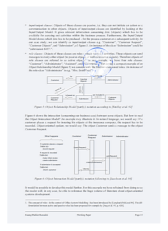

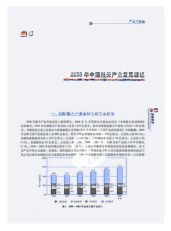

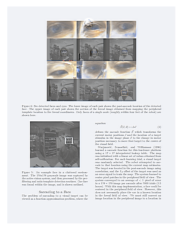

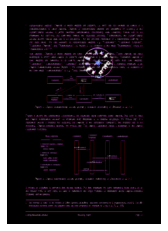

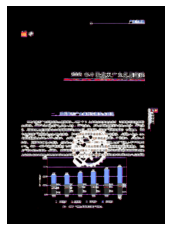

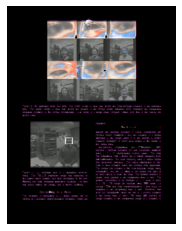

In [ ]:
for i in range(70,85,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_20th_3_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_20th_3_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32'))

Epoch 1/5
188/188 [==============================] - 106s 564ms/step - loss: 84.1767
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 88.5455
Epoch 3/5
188/188 [==============================] - 106s 564ms/step - loss: 93.0161
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 84.3441
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 80.7945


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 563ms/step - loss: 77.1115
Epoch 2/5
188/188 [==============================] - 106s 563ms/step - loss: 75.1485
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 71.7771
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 70.3920
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 72.8960


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 106s 564ms/step - loss: 70.5424
Epoch 2/5
188/188 [==============================] - 106s 564ms/step - loss: 69.4672
Epoch 3/5
188/188 [==============================] - 106s 563ms/step - loss: 65.3247
Epoch 4/5
188/188 [==============================] - 106s 563ms/step - loss: 71.1086
Epoch 5/5
188/188 [==============================] - 106s 563ms/step - loss: 67.5067


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


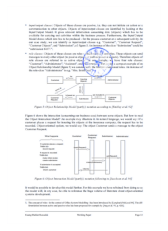

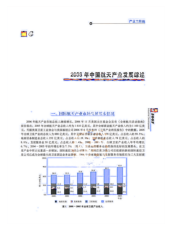

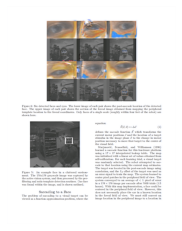

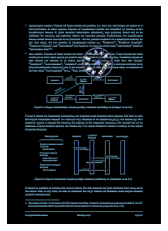

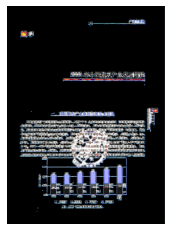

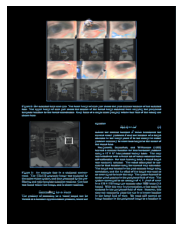

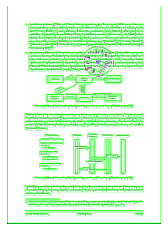

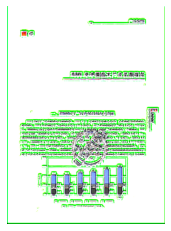

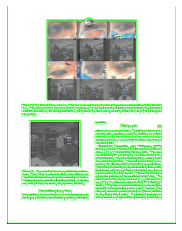

In [ ]:
for i in range(90,105,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_20th_3_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_20th_3_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32'))

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=5)

In [ ]:
model.save('model_20th_3_5epoch.h5')

In [ ]:
simple_pred =  model.predict(simple_img)
mid_pred =  model.predict(mid_img)
hard_pred =  model.predict(hard_img)


In [ ]:
plt.imshow(simple_pred[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(mid_pred[0,:,:,:].astype('int32'))
plt.axis('off')


In [ ]:
plt.imshow(hard_pred[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
cv2.imwrite('model_20th_3_simple_5epoch.png', simple_pred[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_mid_5epoch.png', mid_pred[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_hard_5epoch.png', hard_pred[0,:,:,:].astype('int32')) 

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=5)


In [ ]:
model.save('model_20th_3_10epoch.h5')

In [ ]:
simple_pred2 =  model.predict(simple_img)
mid_pred2 =  model.predict(mid_img)
hard_pred2 =  model.predict(hard_img)



In [ ]:
plt.imshow(simple_pred2[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(mid_pred2[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(hard_pred2[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
cv2.imwrite('model_20th_3_simple_10epoch.png', simple_pred2[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_mid_10epoch.png', mid_pred2[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_hard_10epoch.png', hard_pred2[0,:,:,:].astype('int32')) 

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=5)

In [ ]:
model.save('model_20th_3_15epoch.h5')

In [ ]:
simple_pred3 =  model.predict(simple_img)
mid_pred3 =  model.predict(mid_img)
hard_pred3 =  model.predict(hard_img)



In [ ]:
plt.imshow(simple_pred3[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(mid_pred3[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(hard_pred3[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
cv2.imwrite('model_20th_3_simple_15epoch.png', simple_pred3[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_mid_15epoch.png', mid_pred3[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_hard_15epoch.png', hard_pred3[0,:,:,:].astype('int32')) 

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=5)

In [ ]:
model.save('model_20th_3_20epoch.h5')

In [ ]:
simple_pred4 =  model.predict(simple_img)
mid_pred4 =  model.predict(mid_img)
hard_pred4 =  model.predict(hard_img)


In [ ]:
plt.imshow(simple_pred4[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(mid_pred4[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(hard_pred4[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
cv2.imwrite('model_20th_3_simple_20epoch.png', simple_pred4[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_mid_20epoch.png', mid_pred4[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_hard_20epoch.png', hard_pred4[0,:,:,:].astype('int32')) 

In [ ]:
history5=model.fit(X_train,y_train,batch_size=8,epochs=5)

In [ ]:
model.save('model_20th_3_25epoch.h5')

In [ ]:
simple_pred5 =  model.predict(simple_img)
mid_pred5 =  model.predict(mid_img)
hard_pred5 =  model.predict(hard_img)


In [ ]:
plt.imshow(simple_pred5[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(mid_pred5[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
plt.imshow(hard_pred5[0,:,:,:].astype('int32'))
plt.axis('off')

In [ ]:
cv2.imwrite('model_20th_3_simple_25epoch.png', simple_pred4[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_mid_25epoch.png', mid_pred4[0,:,:,:].astype('int32')) 
cv2.imwrite('model_20th_3_hard_25epoch.png', hard_pred4[0,:,:,:].astype('int32')) 

In [ ]:

for i in range(30,100,5):
  history5=model.fit(X_train,y_train,batch_size=8,epochs=5)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/GR5242/64x64 color output/model_20th_3_100epoch.h5')

Epoch 1/5
188/188 [==============================] - 218s 1s/step - loss: 50.8435
Epoch 2/5
188/188 [==============================] - 217s 1s/step - loss: 53.6625
Epoch 3/5
188/188 [==============================] - 217s 1s/step - loss: 51.9954
Epoch 4/5
188/188 [==============================] - 218s 1s/step - loss: 49.4189
Epoch 5/5
188/188 [==============================] - 217s 1s/step - loss: 55.7943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 218s 1s/step - loss: 46.0587
Epoch 2/5
188/188 [==============================] - 218s 1s/step - loss: 44.2133
Epoch 3/5
188/188 [==============================] - 217s 1s/step - loss: 47.6123
Epoch 4/5
188/188 [==============================] - 218s 1s/step - loss: 46.2514
Epoch 5/5
188/188 [==============================] - 218s 1s/step - loss: 44.3641


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 218s 1s/step - loss: 41.6236
Epoch 2/5
188/188 [==============================] - 218s 1s/step - loss: 38.8856
Epoch 3/5
188/188 [==============================] - 217s 1s/step - loss: 38.1814
Epoch 4/5
188/188 [==============================] - 218s 1s/step - loss: 39.5190
Epoch 5/5
188/188 [==============================] - 217s 1s/step - loss: 36.9247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 218s 1s/step - loss: 35.6936
Epoch 2/5
188/188 [==============================] - 217s 1s/step - loss: 34.2946
Epoch 3/5
188/188 [==============================] - 218s 1s/step - loss: 35.7836
Epoch 4/5
188/188 [==============================] - 217s 1s/step - loss: 35.7200
Epoch 5/5
188/188 [==============================] - 218s 1s/step - loss: 33.1995


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 217s 1s/step - loss: 32.5088
Epoch 2/5
188/188 [==============================] - 218s 1s/step - loss: 47.3629
Epoch 3/5
188/188 [==============================] - 218s 1s/step - loss: 33.9737
Epoch 4/5
188/188 [==============================] - 217s 1s/step - loss: 28.6503
Epoch 5/5
188/188 [==============================] - 217s 1s/step - loss: 28.0274


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 217s 1s/step - loss: 28.5226
Epoch 2/5
188/188 [==============================] - 217s 1s/step - loss: 30.2891
Epoch 3/5
188/188 [==============================] - 217s 1s/step - loss: 25.6744
Epoch 4/5
188/188 [==============================] - 218s 1s/step - loss: 24.4224
Epoch 5/5
188/188 [==============================] - 217s 1s/step - loss: 23.3716


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 217s 1s/step - loss: 24.6189
Epoch 2/5
188/188 [==============================] - 217s 1s/step - loss: 25.2636
Epoch 3/5
188/188 [==============================] - 217s 1s/step - loss: 27.6420
Epoch 4/5
188/188 [==============================] - 217s 1s/step - loss: 24.8259
Epoch 5/5
188/188 [==============================] - 217s 1s/step - loss: 24.9939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


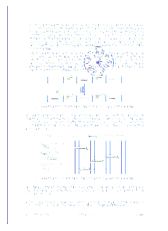

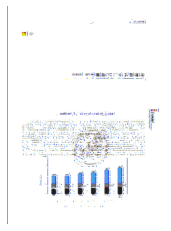

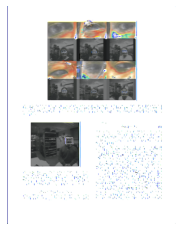

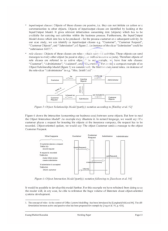

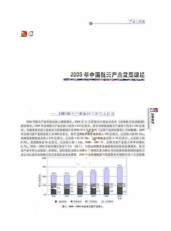

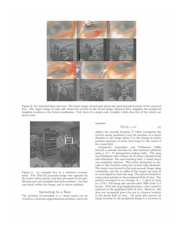

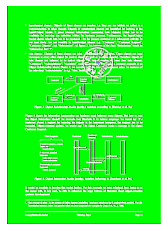

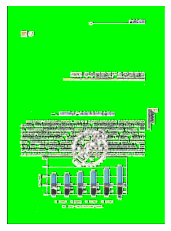

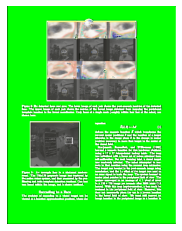

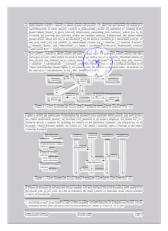

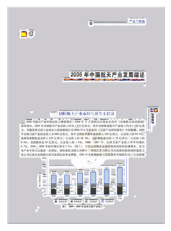

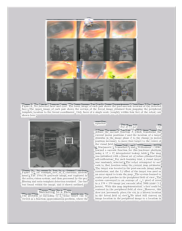

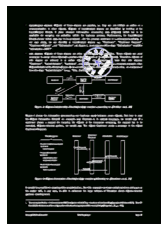

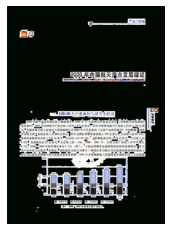

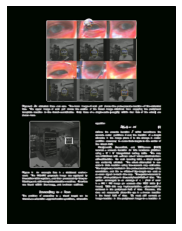

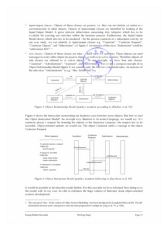

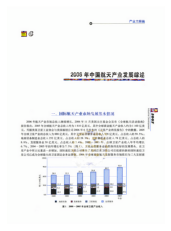

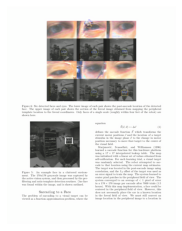

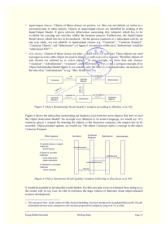

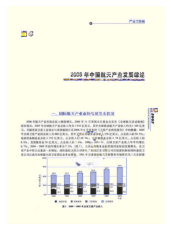

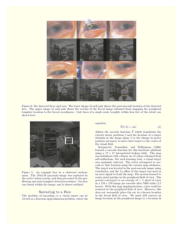

In [23]:
for i in range(105,140,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_20th_3_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_20th_3_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_20th_3_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32'))